***Random Forest Challenge - Run time***

So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

Submit a link to your models below.

***Imports***

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import chardet
import codecs

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import folium
from folium import plugins
from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

In [174]:
cmc = pd.read_csv("/Users/mille/Desktop/CMC.csv")

cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [175]:
cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [176]:
cmc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
Wife_age                        1473 non-null int64
Wife_education                  1473 non-null int64
Husband_education               1473 non-null int64
Number_of_childern_ever_born    1473 non-null int64
Wife_religion                   1473 non-null int64
Wife_now_working                1473 non-null int64
Husband_occupation              1473 non-null int64
Standard_of_living_index        1473 non-null int64
Media_exposure                  1473 non-null int64
Contraceptive method_used       1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


***Information on the dataset***

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.




https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names

Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use 
                                                        2=Long-term
                                                        3=Short-term
                                                        
                                                        

Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of Prediction Accuracy, Complexity, and Training Time of Thirty-three Old and New Classification Algorithms. Machine Learning.

***Summary of Random Forest (RF) trails and Runtimes.***

For all Random Forest models they compared Wife_religion with Wife_education. These two variables are have shown to great influence on the decision to choose contraception. 
Previous analysis with the the same dataset. 
https://github.com/DMiller78/Preparing-Dataset-for-Modeling/blob/master/2-11CMC%20model.ipynb


RF 1: array([0.57432432, 0.49491525, 0.52542373, 0.49659864, 0.50170648]) 
***Most successful Random Forest Model*** - ***Slowest Runtime***

Runtime: --- 0.015958309173583984 seconds --- 
Includes the original full dataframe. 


RF 2: array([0.52702703, 0.49491525, 0.50847458, 0.53061224, 0.4778157 ])

Runtime: --- 0.01596689224243164 seconds --- 
Dropped one column: Standard_of_living_index


RF 3: array([0.52364865, 0.47457627, 0.49491525, 0.50680272, 0.49829352]) 
***Least successful Random Forest Model***

Runtime: --- 0.014962196350097656 seconds ---
Dropped two columns: 'Standard_of_living_index', 'Media_exposure'


RF 4: array([0.55067568, 0.50508475, 0.51186441, 0.5170068 , 0.4778157 ])
***Fastest Runtime***

Runtime: --- 0.012963056564331055 ---
Dropped three columns: 'Standard_of_living_index', 'Media_exposure', 'Husband_occupation'




***Changing Contraceptive method used for categorical values 1=No-use, 2=Long-term, 3=Short-term to terms. ***

In [177]:
cmc['Contraceptive method_used'] = cmc['Contraceptive method_used'].apply({ 1: 'No-use',
  2: 'Long-term',
  3: 'Short-term'}.get)

***Seaborn heatmap Correlation***

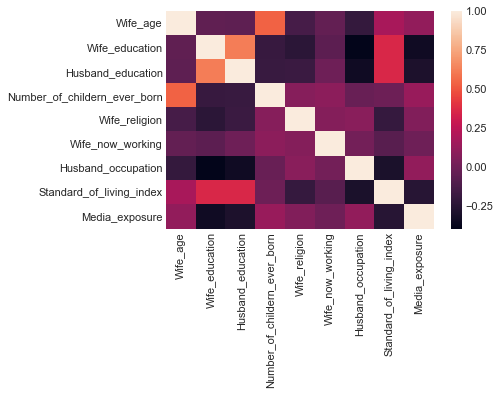

In [178]:
sns.heatmap(cmc.corr())

***Box plots Contraceptive method_used***


C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mille\Conda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


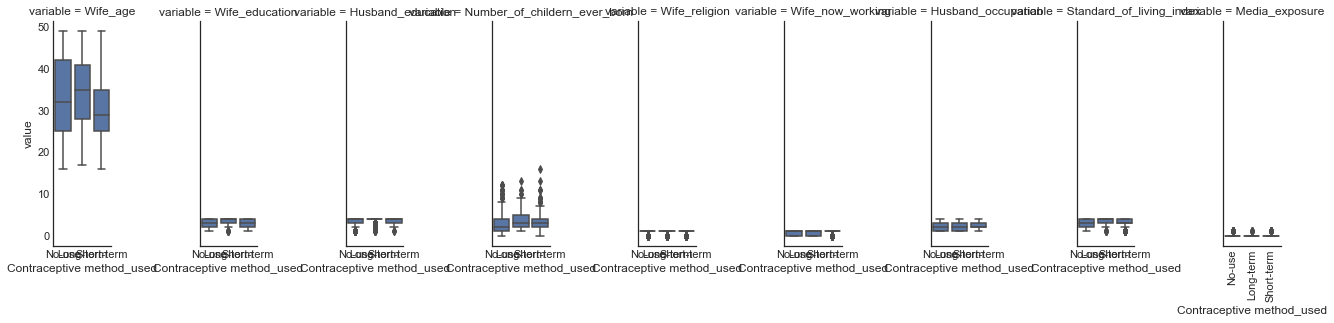

                          Husband_education                                \
                                      count      mean       std  min  25%   
Contraceptive method_used                                                   
Long-term                             333.0  3.663664  0.707810  1.0  4.0   
No-use                                629.0  3.281399  0.902220  1.0  3.0   
Short-term                            511.0  3.459883  0.728856  1.0  3.0   

                                         Husband_occupation           ...   \
                           50%  75%  max              count      mean ...    
Contraceptive method_used                                             ...    
Long-term                  4.0  4.0  4.0              333.0  1.840841 ...    
No-use                     4.0  4.0  4.0              629.0  2.200318 ...    
Short-term                 4.0  4.0  4.0              511.0  2.254403 ...    

                          Wife_now_working      Wife_religion       

In [179]:
df_long = cmc
df_long = pd.melt(df_long, id_vars=['Contraceptive method_used'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "Contraceptive method_used", "value")
g = plt.xticks(rotation=90)

plt.show()

# Descriptive statistics by group.
print(cmc.groupby('Contraceptive method_used').describe())

# Test whether group differences are significant.
for col in cmc.loc[:,'Wife_religion':'Wife_education'].columns:
    print(col)
    print(stats.ttest_ind(
        cmc[cmc['Contraceptive method_used'] == 1][col].dropna(),
        cmc[cmc['Contraceptive method_used'] == 2][col].dropna(),
        cmc[cmc['Contraceptive method_used'] == 3][col].dropna()
    ))

***First pass - Random Forest***



In [180]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

def main():
    rfc = ensemble.RandomForestClassifier()
    X = cmc.drop('Wife_religion', 1)
    Y = cmc['Wife_education']
    X = pd.get_dummies(X)
    
cross_val_score(rfc, X, Y, cv=5)

C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

array([0.54054054, 0.51525424, 0.51864407, 0.52721088, 0.46075085])

***Calculating Random Forest runtime***

In [181]:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.015958309173583984 seconds ---


In [182]:
categorical = cmc.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Contraceptive method_used
3


In [183]:
cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,No-use
1,45,1,3,10,1,1,3,4,0,No-use
2,43,2,3,7,1,1,3,4,0,No-use
3,42,3,2,9,1,1,3,3,0,No-use
4,36,3,3,8,1,1,3,2,0,No-use


***Dropping columns to change out Random Forest output***

In [184]:

cmc1 = cmc.drop(columns=['Standard_of_living_index'])

In [185]:
cmc1.tail()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Media_exposure,Contraceptive method_used
1468,33,4,4,2,1,0,2,0,Short-term
1469,33,4,4,3,1,1,1,0,Short-term
1470,39,3,3,8,1,0,1,0,Short-term
1471,33,3,3,4,1,0,2,0,Short-term
1472,17,3,3,1,1,1,2,0,Short-term


In [186]:
pd.get_dummies(cmc1)

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Media_exposure,Contraceptive method_used_Long-term,Contraceptive method_used_No-use,Contraceptive method_used_Short-term
0,24,2,3,3,1,1,2,0,0,1,0
1,45,1,3,10,1,1,3,0,0,1,0
2,43,2,3,7,1,1,3,0,0,1,0
3,42,3,2,9,1,1,3,0,0,1,0
4,36,3,3,8,1,1,3,0,0,1,0
5,19,4,4,0,1,1,3,0,0,1,0
6,38,2,3,6,1,1,3,0,0,1,0
7,21,3,3,1,1,0,3,0,0,1,0
8,27,2,3,3,1,1,3,0,0,1,0
9,45,1,1,8,1,1,2,1,0,1,0


***Second Pass - Random Forest***

In [187]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

def main():
    rfc = ensemble.RandomForestClassifier()
    X = cmc1.drop('Wife_religion', 1)
    Y = cmc1['Wife_education']
    X = pd.get_dummies(X)
    
cross_val_score(rfc, X, Y, cv=5)

C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

array([0.54054054, 0.50508475, 0.49491525, 0.54761905, 0.50170648])

***Second Pass of Random Forest runtime***

In [188]:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.01596689224243164 seconds ---


In [189]:
cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,No-use
1,45,1,3,10,1,1,3,4,0,No-use
2,43,2,3,7,1,1,3,4,0,No-use
3,42,3,2,9,1,1,3,3,0,No-use
4,36,3,3,8,1,1,3,2,0,No-use


***Dropping columns***

In [190]:
cmc2 = cmc.drop(columns=['Standard_of_living_index', 'Media_exposure'])

***Third Pass - Random Forest*** 
Dropping 3 columns from the dataset. 

In [191]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

def main():
    rfc = ensemble.RandomForestClassifier()
    X = cmc2.drop('Wife_religion', 1)
    Y = cmc2['Wife_education']
    X = pd.get_dummies(X)
    
cross_val_score(rfc, X, Y, cv=5)

C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

array([0.52364865, 0.47118644, 0.47118644, 0.50340136, 0.4778157 ])

***Third Pass - Random Forest runtime***

In [192]:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.014962196350097656 seconds ---


In [193]:
cmc.head()

,Wife_age,Wife_education,Husband_education,Number_of_childern_ever_born,Wife_religion,Wife_now_working,Husband_occupation,Standard_of_living_index,Media_exposure,Contraceptive method_used
0,24,2,3,3,1,1,2,3,0,No-use
1,45,1,3,10,1,1,3,4,0,No-use
2,43,2,3,7,1,1,3,4,0,No-use
3,42,3,2,9,1,1,3,3,0,No-use
4,36,3,3,8,1,1,3,2,0,No-use


***Dropping new columns***

In [194]:
cmc3 = cmc.drop(columns=['Standard_of_living_index', 'Media_exposure', 'Husband_occupation'])

***Fourth Pass - Random Forest***

In [195]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

def main():
    rfc = ensemble.RandomForestClassifier()
    X = cmc3.drop('Wife_religion', 1)
    Y = cmc3['Wife_age']
    X = pd.get_dummies(X)
    
cross_val_score(rfc, X, Y, cv=5)

C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mille\Conda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

array([0.50675676, 0.50169492, 0.48813559, 0.51360544, 0.48122867])

***Fourth Pass - runtime of the random forest***

In [196]:
import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.012963056564331055 seconds ---
